# Семинар 1
# Программные инструменты для работы с компьютерным зрением
# Курс "Компьютерное зрение"

## 1. Основные библиотеки для работы с изображениями
## 1.1. Основные библиотеки
### Библиотека Matplotlib
Для построения графиков, рисования точек и прямых, вывода изображений применяется графическая библиотека Matplotlib. Интерфейс PyLab, включенный в Matplotlib, - это набор функций, позволяющий пользователю строить графики. Для импортирования библиотеки можно использовать либо:  
import pylab import *     
либо:  
import matplotlib.pyplot as plt  

### PIL - библиотека Python Imaging Library
Библиотека PIL сожержит общие средства для обработки изображений: изменение размера, кадрирование, поворот, преобразование цветов.  
PIL позволяет читать изображения, записанные в большинстве популярных форматов.

### Пакет NumPy
Пакет Numpy часто используется для научных расчетов. NumPy включает ряд полезных концепций, в частности объекты-массивы (для представления векторов, матриц, изображений) и функции из области линейной алгебры. Далее массивы NumPy будут использоваться очень активно. Объект массива позволяет выполнять такие важные операции, как умножение матриц, транспонирование, решение систем линейных уравнений, скалярное умножение и нормировку векторов. Все это необходимо для таких вещей, как совмещение изображений, деформирование, различные виды моделирования, классификация и группировка изображений.

### Пакет SciPy
Пакет SciPy - пакет математических программ с открытым исходным кодом. Он построен на базе NumPy и предоставляет эффективные функции для выполнения многих операций, в том числе численного интегрирования, оптимизации, статистики, обработки сигналов и изображений.

Импотрируем указанные библиотеки:

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import scipy.ndimage as sp

## 1.2. Примеры использования библиотеки PIL
Считаем изображение и построим изображение. Для того, чтобы matplotlib смог построить изображение, необходимо преобразовать его в матричный вид.

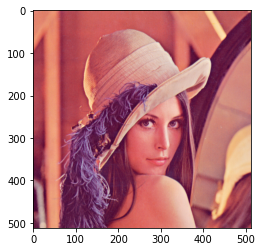

In [2]:
# read image to array
pil_im = Image.open("Test_image.png")
im = np.array(pil_im)
# plot the image
plt.imshow(im)
plt.show()

In [3]:
im.shape

(512, 512, 3)

Для преобразования цветов воспользуемся методом convert(). Чтобы проичтать изображение и сделать его полутоновым, сделаем следующее:

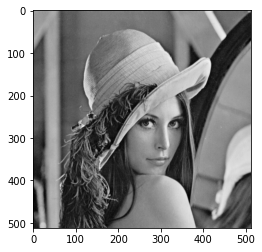

In [4]:
# read image to array
im_gr = np.array(Image.open("Test_image.png").convert('L'))
# plot the image
plt.imshow(im_gr, cmap="gray")
plt.show()

In [5]:
im_gr.shape

(512, 512)

Преобразуем изображение в другой формат. С помощью метода save() библиотека PIL может сохранять изображения в большинстве графических форматов. В следующем примере мы читаем изображение из файла, а затем преобразуем в формат JPEG.

In [6]:
input_filename = "Test_image.png"
output_filename = "Test_image.jpg"

Image.open(input_filename).save(output_filename)

Копируем и вставим область изображения. Обрезка (кадрирование) изображения производится методом crop(). Прямоугольная область определяется кортежем, содержащим 4 значения координат сторон (левая, верхняя, правая, нижняя). В PIL используется система координат с началом (0,0) в левом верхнем углу.  
С вырезанной областью можно затем производить различные операции, например, повернуть и вставить в то же самое место методом paste():

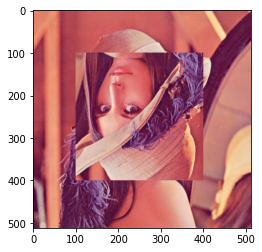

In [7]:
box = (100, 100, 400, 400)
region = pil_im.crop(box).transpose(Image.ROTATE_180)
pil_im.paste(region, box)

# plot the image
plt.imshow(np.array(pil_im))
plt.show()

Изменение размера и поворот. Для изменения размера изображения служит метод resize(), которому передается кортеж, определяющий новый размер изображения.   
Для поворота изображения вызывается метод rotate() и задается угол в направлении против часовой стрелки.

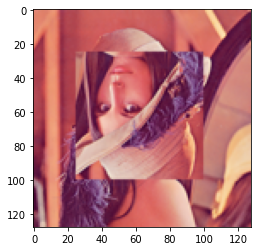

In [8]:
out = pil_im.resize((128, 128))
plt.imshow(np.array(out))

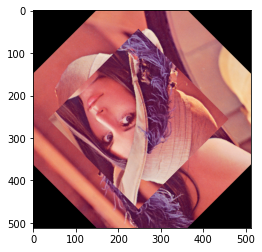

In [9]:
out = pil_im.rotate(45)
plt.imshow(np.array(out))

## 1.3. Примеры использования библиотеки Matplotlib
Рисование точек и прямых линий. Далее представлен пример насения на изображение нескольких точек и отрезка прямой. На график помещается изображение, затем четыре точки, обозначенные красными звездочками (их координаты задаются в списках x, y), и наконец, отрезок прямой, соединяющий первые две точки из списка.  
Оси на итоговом изображении можно отключить с помощью:  
plt.axis("off")

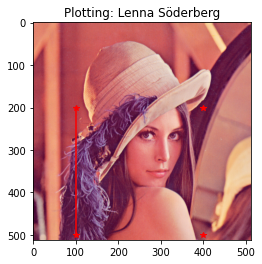

In [10]:
# read image to array
im = np.array(Image.open("Test_image.png"))

# plot the image
plt.imshow(im)

# some points
x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plt.plot(x,y,'r*')

# line plot connecting the first two points
plt.plot(x[:2],y[:2], "red")

# add title and show the plot
plt.title('Plotting: Lenna Söderberg')
plt.show()

Изолинии и гистограммы изображений. Рассмотрим два примера специальных графиков: изолинии и гистограммы изображений.   
Для построения изолиний требуется использовать полутоновые изображения:

(0.5, 511.5, 0.5, 511.5)

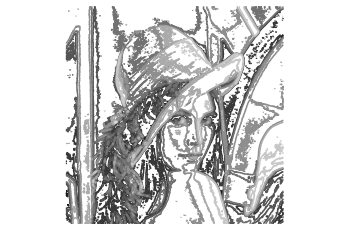

In [11]:
# read image to array
im = np.array(Image.open("Test_image.png").convert('L'))

# create a new figure
plt.figure()
# don’t use colors
plt.gray()
# show contours with origin upper left corner
plt.contour(im, origin='image')
plt.axis('equal')
plt.axis('off')

Гистограмма изображения - это график распределения значений пикселей. Область возможных значений разбивается на интервалы, и для каждого интервала определяется количество пикселей, значения которых попадают в этот интервал. Для построения гистограммы полутонового изображения применяется функция hist(). Ее второй аргумент задает количество интервалов. Отметим, что изображение сначала необходимо линеаризовать, потому что hist() ожидает получить на вход одномерный массив. Метод flatten() преобразует любой массив в одномерный.

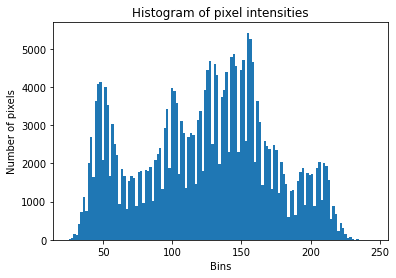

In [12]:
plt.figure()
plt.hist(im.flatten(),128)
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
plt.title('Histogram of pixel intensities')
plt.show()

Интерактивное аннотирование. Иногда пользователям нужно взаимодействовать с приложением, например, помечать точки изображения или аннотировать обучающие данные. В библиотеке Matplotlib для этого используется функция ginput()

In [13]:
# Воспользуемся внешним бэкендом для построения изображений
import matplotlib
matplotlib.use('TkAgg')
%matplotlib qt
# the interactive plot

In [14]:
im = np.array(Image.open('Test_image.png'))
plt.imshow(im)
print('Please click 3 points')
x = plt.ginput(3)
print('you clicked:',x)
plt.show()

Please click 3 points
you clicked: [(405.1103896103897, 105.33549783549773), (218.0974025974026, 213.38744588744584), (319.2229437229437, 106.72077922077915)]


In [15]:
# Возврат к встроенному отображению
%matplotlib inline

## 1.4. Примеры использования пакета NumPy
Представление изображение в виде массива. Загружая изображения в предыдущих примерах, мы преобразовывали их в массивы. Массивы в Numpy многомерные и могут использоваться для представления векторов, матриц, изображений. Массив похож на список (или список списков), но может содержать только элементы одного типа. Если тип не указа при создании массива, то он автоматически определяется из данных.

In [16]:
im = np.array(Image.open('Test_image.png'))
print(im.shape, im.dtype)

im_gr = np.array(Image.open('Test_image.png').convert('L'),'f')
print(im_gr.shape, im_gr.dtype)

(512, 512, 3) uint8
(512, 512) float32


Изображения обычно кодируются 8-битными целыми числами без знака (uint8), поэтому при загрузке этого изображения и преобразовании в массив в первом случае получается тип uint8. Во втором случае выполняется преобразование в оттенки серого и создается массив с дополнительным аргументом «f». Это короткая команда для установки типа с плавающей запятой. Обратим внимание, что изображение в градациях серого имеет только два значения в кортеже формы; очевидно, что у него нет информации о цвете. 

После считывания изображений в массивы NumPy мы можем выполнять с ними любые математические операции, которые нам нравятся. Простым примером этого является преобразование уровней градации серого на изображении. Возьмем любую функцию f, отображающую интервал 0. . . 255 (или, если вам нравится 0 ... 1) самому себе (это означает, что выходной диапазон имеет тот же диапазон, что и входной). Вот несколько примеров.

[]

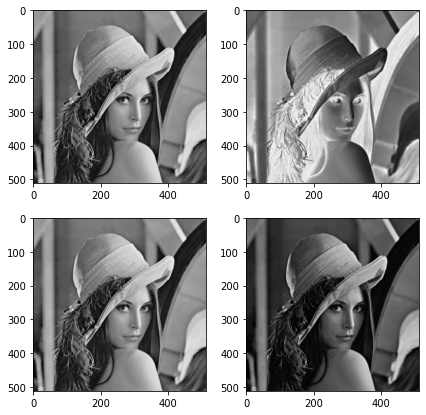

In [17]:
im = np.array(Image.open('Test_image.png').convert('L'))
im2 = 255 - im #invert image
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 #squared

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, figsize=(7,7))
axs[0, 0].imshow(im, cmap="gray")
axs[0, 1].imshow(im2, cmap="gray")
axs[1, 0].imshow(im3, cmap="gray")
axs[1, 1].imshow(im4, cmap="gray")
plt.plot()

Выравнивание гистограммы. Очень полезный пример преобразования - выравнивание гистограммы. Это преобразование сглаживает гистограмму, чтобы результирующая гистограмма содержала все возможные значения яркости и при этом в примерно одинаковом количестве. Это хороший способ нормализовать интенсивность изображения перед дальнейшей обработкой, а также способ увеличить контраст изображения. Функция преобразования в этом случае является кумулятивной функцией распределения (cdf) значений пикселей в изображении (нормализованной для отображения диапазона значений пикселей в желаемый диапазон).

In [18]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

Функция принимает изображение в градациях серого и количество интервалов для использования в гистограмме в качестве входных данных и возвращает изображение с выровненной гистограммой вместе с кумулятивной функцией распределения, используемой для сопоставления значений пикселей

<ipython-input-18-39623d1992a0>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)


[]

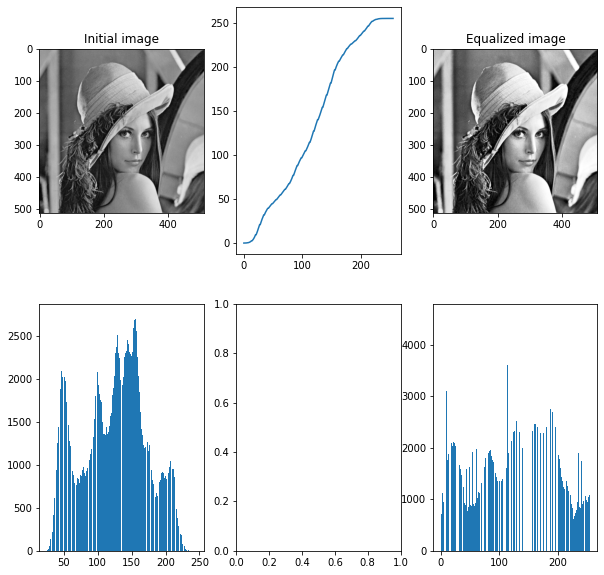

In [19]:
im_equal, cdf = histeq(im)

fig, axs = plt.subplots(2, 3, figsize=(10,10))
axs[0, 0].imshow(im, cmap="gray")
axs[0, 0].title.set_text('Initial image')
axs[0, 1].plot(cdf)
axs[0, 2].imshow(im_equal, cmap="gray")
axs[0, 2].title.set_text('Equalized image')
axs[1, 0].hist(im.flatten(),256)
axs[1, 2].hist(im_equal.flatten(),256)
plt.plot()

## 1.5. Примеры использования пакета SciPy
Размытие изображений. Классическим и очень полезным примером свертки изображений является размытие изображений по Гауссу. По сути, изображение I (в оттенках серого) сворачивается с гауссовым фильтром для создания размытого изображения:
$$ I_{\sigma} = I * G_{\sigma}$$
где * означает операцию свертки, а G - это 2-мерное ядро Гауссового фильтра:
$$ G_{\sigma} = \dfrac{1}{2\pi\sigma}e^{-(x^{2}+y^{2})/2\sigma^{2}}$$
Размытие по Гауссу используется для для интерполяции, для вычисления особых точек изображения и во многих других приложениях. SciPy предлагает модуль фильтрации, называемый scipy.ndimage.filters, который можно использовать для вычисления этих сверток с использованием быстрого метода разделения переменных.

[]

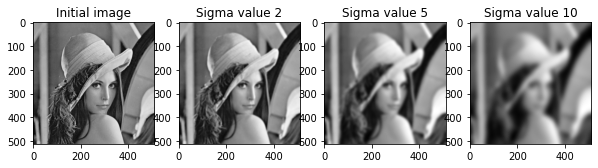

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(10,10))
axs[0].imshow(im, cmap="gray")
axs[0].title.set_text('Initial image')

for i, sigma in enumerate([2, 5, 10]):
    axs[i+1].imshow(sp.filters.gaussian_filter(im,sigma), cmap="gray")
    axs[i+1].title.set_text(f'Sigma value {sigma}')
    
plt.plot()

Вычисление производных по изображению. То, как интенсивность изображения изменяется по всему изображению, является важной информацией, которая используется во многих приложениях, например, для выделения границ. Изменение интенсивности описывается производными по x и y серошкального изображения I (для цветных изображений производные обычно берутся для каждого цветового канала).  
Градиент изображения - это вектор, который описывается амплитудой градиента: 
$$ |\nabla I|=\sqrt{I_{x}^{2} + I_{y}^{2}} $$
которая описывает, насколько сильно изменяется интенсивность изображения;  
и угол градиента: 
$$ \alpha = arctan2(I_{y},I_{x})$$
который обозначает направления наибольшего изменения интенсивности в каждой точке изображения.  
Однако на практие для вычисления производных от изображения применяют дискретные аппроксимации, которые реализуются через операцию свертки со специализированным фильтром. Например фильтры Prewitt: 
$$ D_{x} = \begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{bmatrix} $$

$$ D_{y} = \begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix} $$

И фильтры Собеля: 
$$ D_{x} = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{bmatrix} $$

$$ D_{y} = \begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1\\
\end{bmatrix} $$

[]

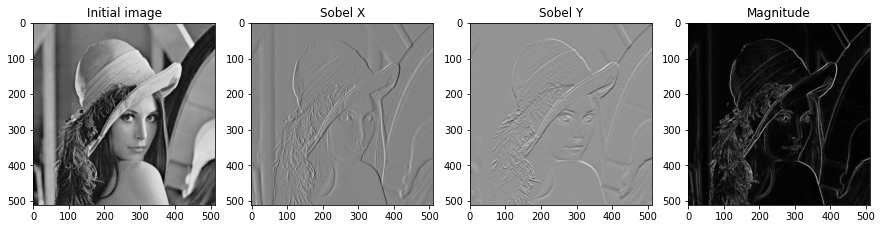

In [21]:
#Sobel derivative filters
imx = np.zeros(im.shape)
sp.filters.sobel(im,1,imx)

imy = np.zeros(im.shape)
sp.filters.sobel(im,0,imy)

magnitude = np.sqrt(imx**2+imy**2)

fig, axs = plt.subplots(1, 4, figsize=(15,15))
axs[0].imshow(im, cmap="gray")
axs[0].title.set_text('Initial image')
axs[1].imshow(imx, cmap="gray")
axs[1].title.set_text('Sobel X')
axs[2].imshow(imy, cmap="gray")
axs[2].title.set_text('Sobel Y')
axs[3].imshow(magnitude, cmap="gray")
axs[3].title.set_text('Magnitude')

plt.plot()

## 2. Введение в библиотеку OpenCV
OpenCV - это библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Это мощная библиотека, позволяющая решать существенное большинство задач компьютерного зрения. Начнем с базовых функций этой библиотеки.

In [22]:
import cv2 as cv

## 2.1. Считывание и сохранение изображений и видео
Считаем изображение из файла, отобразим его в отдельном окне и запишем изображение в новый файл.  
Для начала считаем путь к файлу с помощью функции imread().При выводе изображения открывается новое окно. Находясь на данном окне, можно нажать клавишу "s" для сохранения изображения в формате png.

In [23]:
import sys
img = cv.imread("starry_night.jpg")

cv.imshow("Display window", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("starry_night.png", img)

Считаем видео с камеры и выведем его на экран. Часто нам приходится снимать прямую трансляцию с помощью камеры. OpenCV предоставляет для этого очень простой интерфейс. Давайте снимем видео с камеры, преобразуем его в видео в оттенках серого и отобразим. 
Чтобы записать видео, вам необходимо создать объект VideoCapture. Его аргументом может быть либо индекс устройства, либо имя видеофайла. Индекс устройства - это просто номер, указывающий, какую камера использовать. Обычно будет подключена одна камера. Поэтому просто передаем 0 (или -1). Вы можете выбрать вторую камеру, передав 1 и так далее. После этого вы можете снимать кадр за кадром. Но в конце не забудьте отпустить ресурс камеры.

In [24]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

cap.read() возвращает True/False. В случае, если кадр считан правильно, возвращается True.   
Для проверки правильности инициализации камеры можно использовать cap.isOpened(). Если ининциализация произошла некорректно, то можно обратиться к ресурсу камеры заново: cap.open().  
Также существует возможность обратиться к некоторым свойствам видео, используя cap.get(propId), где propId может принимать значения от 0 до 18 и обозначает конкретное свойство, например, cap.get(cv.CAP_PROP_FRAME_WIDTH) и cap.get(cv.CAP_PROP_FRAME_HEIGHT). Чтобы изменить параметры видео можно сделать следующее:  
ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320)  
ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240)

Для сохранения видео требуется создания объекта VideoWriter. Мы должны указать имя выходного файла (например: output.avi). Затем мы должны указать код FourCC. Затем следует передать количество кадров в секунду (fps) и размер кадра. И последний - флаг isColor. Если это True, кодировщик ожидает цветной кадр, в противном случае он работает с изображением в градациях серого.
FourCC - это 4-байтовый код, используемый для определения видеокодека. Список доступных кодов можно найти на сайте fourcc.org. Это зависит от платформы.  
Приведенный ниже код выполняет захват с камеры, переворачивает каждый кадр в вертикальном направлении и сохраняет видео.

In [25]:
cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    frame = cv.flip(frame, 0)
    
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
        
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

## 2.2. Инструменты рисования
Нарисуем геометрические фигуры с помощью библиотеки OpenCV: cv.line(), cv.circle() , cv.rectangle(), cv.ellipse(). В качестве аргументов этих функций часто передаются следующие:
- img: изображение, на котором формируются фигуры,
- color: цвет объекта, (x,x,x) для цветного изображения, x - для оттенков серого,
- thickness: толщина линии, если значение == -1, то фигура будет заполнена (например круг, а не окружность),
- lineType: тип линии.  

Нарисуем линию:

[]

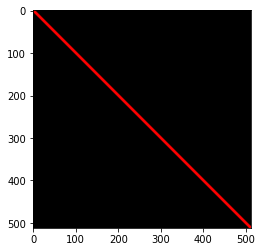

In [26]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)

plt.imshow(img)
plt.plot()

Нарисуем квадрат:

[]

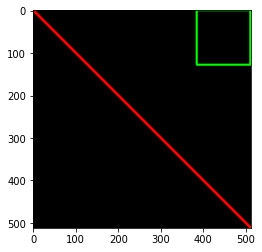

In [27]:
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
plt.imshow(img)
plt.plot()

Нарисуем круг:

[]

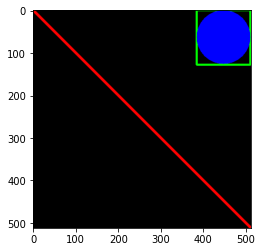

In [28]:
cv.circle(img,(447,63), 63, (0,0,255), -1)
plt.imshow(img)
plt.plot()

Добавим текст на изображения. Для этого укажем:
- текст, который мы хотим вывести,
- нижнюю-левую координату расположения надписи,
- тип шрифта,
- размер шрифта,
- прочие параметры, такие как цвет, толщина и т.д.

[]

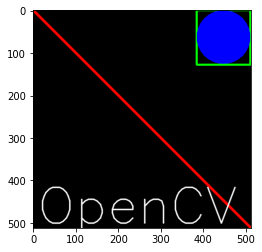

In [29]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
plt.imshow(img)
plt.plot()

Сделаем интерактивный режим рисования, который в зависимости от режима может отображать на картинке либо квадраты, либо круги. При этом для управления рисования воспользуемся событиями: нажатие левой кнопкой мыши, отпускание левой кнопки мыши, движение мышью. Данный пример будет полезен в контексте создания и понимания прикладных приложений отслеживания объектов и сегментации.  
Для начала зададим функцию, определяющую поведение мыши:

In [30]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    
    global ix,iy,drawing,mode
    
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
                
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)

Выведем предыдущую картинку в отдельное окно, в котором будем рисовать фигуры:

In [31]:
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == ord('q'):
        break
cv.destroyAllWindows()

## 2.3. Базовые операции над изображениями
Начнем с доступа к отдельному каналу изображения. Для этого можно выполнить следуюшие операции с помощью numpy:

In [32]:
img = cv.imread('messi.jpg')

def channel_blue(img):
    img[:,:,1] = 0
    img[:,:,2] = 0
    return img

cv.imshow("Display window", channel_blue(img))
k = cv.waitKey(0)

Выделим определенную область из изображения и вставим ее в другую часть исходного:

In [33]:
img = cv.imread('messi.jpg')

ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

cv.imshow("Display window", img)
k = cv.waitKey(0)

Создадим рамку вокруг изображений с помощью cv.copyMakeBorder(). Это может применено в случае выполнения операции свертки (zero-padding).

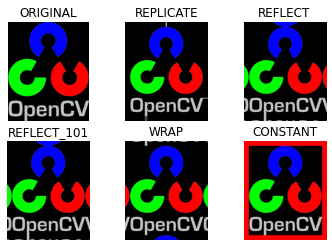

In [34]:
RED = [255,0,0]

img1 = cv.imread('opencv.png')

replicate = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_CONSTANT,value=RED)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL'), plt.axis("off")
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE'), plt.axis("off")
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT'), plt.axis("off")
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101'), plt.axis("off")
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP'), plt.axis("off")
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT'), plt.axis("off")

plt.show()

Наложим одну картинку на другую. Для этого можно использовать наложение изображений с установлением прозрачности для каждого:

In [35]:
img1 = cv.imread('messi.jpg')
img2 = cv.imread('opencv.png')
img2 = cv.resize(img2, dsize=(img1.shape[1], img1.shape[0]))

dst = cv.addWeighted(img1,0.5,img2,0.5,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

Второй подход заключается в выделении только эмблемы OpenCV из изображения img2 с последующим наложением на картинку img1 с помощью попиксельных логических операций и бинаризации по порогу.

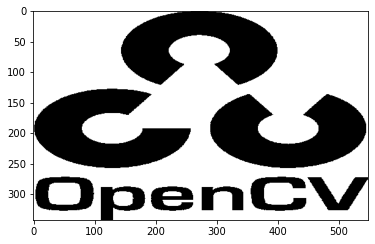

In [36]:
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

plt.imshow(mask_inv)

In [37]:
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)

img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

## Задание
Для изображения "starry_night.jpg":
1. Считать изображение
2. Перевести в серошкальный формат
3. Провести эквализацию гистограммы
4. Выделить границы на изображении
5. Добавить на изображение элипсы произвольного цвета (использовать random)
6. Добавить на изображение лого OpenCV
7. Сохранить результат в формате PNG